# Random Forest

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel

In [ ]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   date            1168 non-null   object
 2   malfunction     1168 non-null   int64 
 3   feature1        1168 non-null   int64 
 4   feature2        1168 non-null   int64 
 5   feature3        1168 non-null   int64 
 6   feature4        1168 non-null   int64 
 7   feature5        1168 non-null   int64 
 8   feature6        1168 non-null   int64 
 9   feature7        1168 non-null   int64 
 10  feature9        1168 non-null   int64 
 11  active          1168 non-null   int64 
 12  month           1168 non-null   int64 
 13  Day_of_week     1168 non-null   int64 
 14  max_date        1168 non-null   object
 15  failure_before  1168 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 146.1+ KB


In [ ]:
df.drop(['date','max_date'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   malfunction     1168 non-null   int64 
 2   feature1        1168 non-null   int64 
 3   feature2        1168 non-null   int64 
 4   feature3        1168 non-null   int64 
 5   feature4        1168 non-null   int64 
 6   feature5        1168 non-null   int64 
 7   feature6        1168 non-null   int64 
 8   feature7        1168 non-null   int64 
 9   feature9        1168 non-null   int64 
 10  active          1168 non-null   int64 
 11  month           1168 non-null   int64 
 12  Day_of_week     1168 non-null   int64 
 13  failure_before  1168 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 127.9+ KB


In [ ]:
df.nunique()

,0
product,7
malfunction,2
feature1,1168
feature2,102
feature3,43
feature4,55
feature5,58
feature6,1129
feature7,14
feature9,63


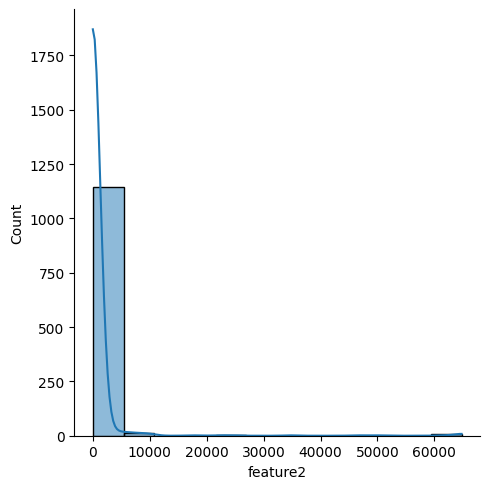

In [ ]:
sns.displot(df['feature2'], kde = True)

In [ ]:
scaler = StandardScaler()
num_vars = ['feature1', 'feature2', 'feature6']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   int64  
 5   feature4        1168 non-null   int64  
 6   feature5        1168 non-null   int64  
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   int64  
 9   feature9        1168 non-null   int64  
 10  active          1168 non-null   int64  
 11  month           1168 non-null   int64  
 12  Day_of_week     1168 non-null   int64  
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 127.9+ KB


In [ ]:
for col in ['month','Day_of_week', 'feature3', 'feature4', 'feature5', 'feature7', 'feature9']:
  df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   object 
 5   feature4        1168 non-null   object 
 6   feature5        1168 non-null   object 
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   object 
 9   feature9        1168 non-null   object 
 10  active          1168 non-null   int64  
 11  month           1168 non-null   object 
 12  Day_of_week     1168 non-null   object 
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 127.9+ KB


In [ ]:
df = pd.get_dummies(df, drop_first = True)
df.shape

(1168, 254)

In [ ]:
print(df.shape)
df['malfunction'].value_counts()

(1168, 254)


,count
malfunction,
0,1161
1,7


In [ ]:
X = df.drop('malfunction', axis = 1)
Y = df['malfunction']      #target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(len(X_train), len(X_test))

934 234


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
rfc_pred = rfc.predict(X_test)

print ("Train Accuracy=", round(accuracy_score(Y_train, rfc.predict(X_train)), 4))
print ("Test Accuracy=", round(accuracy_score(Y_test, rfc_pred), 4))

Train Accuracy= 1.0
Test Accuracy= 0.9957


In [ ]:
cm = confusion_matrix(Y_test, rfc_pred)
print('Confusion matrix:')
print(cm)

print('Classification Report:')
print(classification_report(Y_test, rfc_pred))

Confusion matrix:
[[233   0]
 [  1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.00      0.00      0.00         1

    accuracy                           1.00       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.99      1.00      0.99       234



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


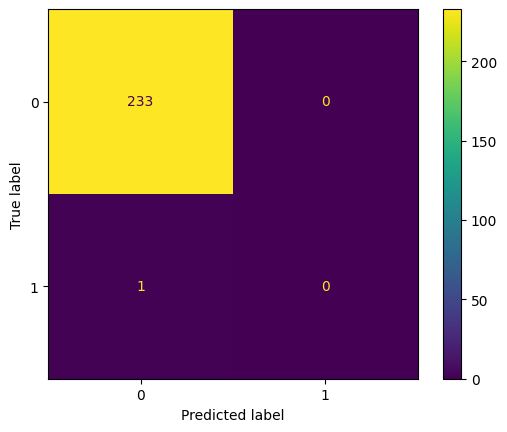

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()

<Axes: ylabel='Features'>

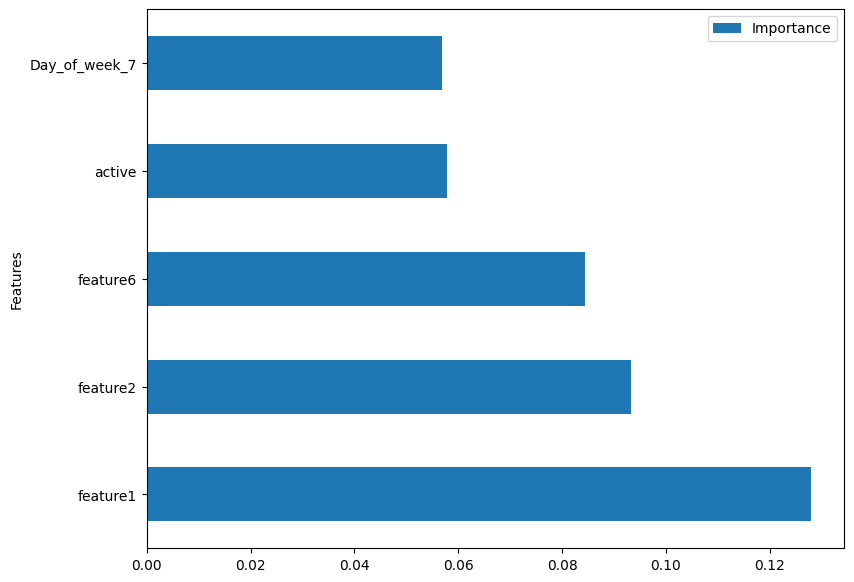

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X,Y)

features = pd.DataFrame()
features['Features']= X.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by = ['Importance'], ascending = False, inplace = True)
features.set_index('Features', inplace = True)
features.iloc[:5,:].plot(kind = 'barh', figsize = (9, 7))

In [ ]:
model = SelectFromModel(clf)
x_reduced = model.transform(X)
print(x_reduced.shape)

(1168, 30)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# XGBoost

In [166]:
import xgboost as xgb

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(len(X_train), len(X_test))

934 234


In [168]:
y1_train = pd.to_numeric(Y_train)
xgb_model = xgb.XGBClassifier(objective= 'binary:logistic', n_estimators = 100, eval_metric = "logloss", random_state = 42)

xgb_model.fit(X_train, y1_train, verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [172]:
print ("Train Accuracy =", round(accuracy_score(y1_train, xgb_model.predict(X_train)), 4))

Train Accuracy = 0.9989


In [169]:
y1_test = pd.to_numeric(Y_test)
y_pred = xgb_model.predict(X_test)

print ("Test Accuracy = ", round(accuracy_score(y1_test, y_pred), 4))

Test Accuracy =  0.9957


In [170]:
cm_pred = confusion_matrix(y1_test, y_pred)
print('Confusion Matrix:')
print(cm_pred)

Confusion Matrix:
[[233   0]
 [  1   0]]


In [ ]:
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_model.classes_)
#disp.plot()

In [171]:
print('Classification Report:')
print(classification_report(y1_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.00      0.00      0.00         1

    accuracy                           1.00       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.99      1.00      0.99       234



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


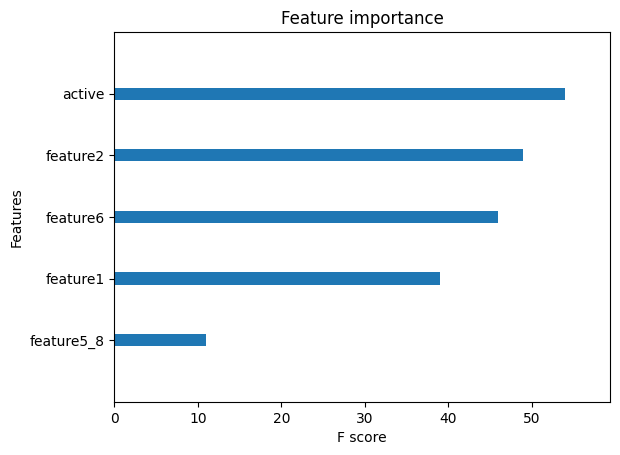

In [ ]:
xgb.plot_importance(xgb_model, max_num_features = 5, show_values = False)
plt.grid(False)

In [173]:
model = SelectFromModel(xgb_model)
x0_reduced = model.transform(X)
print(x0_reduced.shape)

(1168, 12)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
